In [49]:
import numpy as np
import os
import pandas as pd
import yaml

from pathlib import Path

import matplotlib.pyplot as plt

from assistive_arm.utils.optimum_length_utils import smooth_dataframe, interpolate_dataframe

In [50]:
log_dir = Path("../subject_logs/")
day_path = log_dir / "subject_Xabi"

for file in day_path.iterdir():
    if file.suffix == ".csv":
        with open(file, 'r') as f:
            lines = f.readlines()
            if len(lines) == 1 and lines[0].strip() == 'time,position,velocity,torque':
                os.remove(file)

sorted_paths = sorted(os.listdir(day_path), key=lambda x: x.split("_"), reverse=True)

for path in sorted_paths:
    print(path)

print('\nLast log: ', sorted_paths[1]) # 1 because 0 is always yaml


calibration_data.yaml
1_fixed_force_time_37_force_62.csv
1_fixed_force_time_27_force_62.csv

Last log:  1_fixed_force_time_37_force_62.csv


In [51]:
log_name = sorted_paths[1]
log_name = "1_fixed_force_time_27_force_62.csv"

log_path = day_path / log_name
yaml_path = day_path / "calibration_data.yaml"

In [52]:
task_df = pd.read_csv(log_path, index_col='time').iloc[30:]
profile = pd.read_csv("../torque_profiles/scaled_simulation_profile.csv")

# open yaml file
with open(yaml_path, 'r') as f:
    calibration_file = yaml.load(f, Loader=yaml.FullLoader)

Text(0.5, 0, 'time')

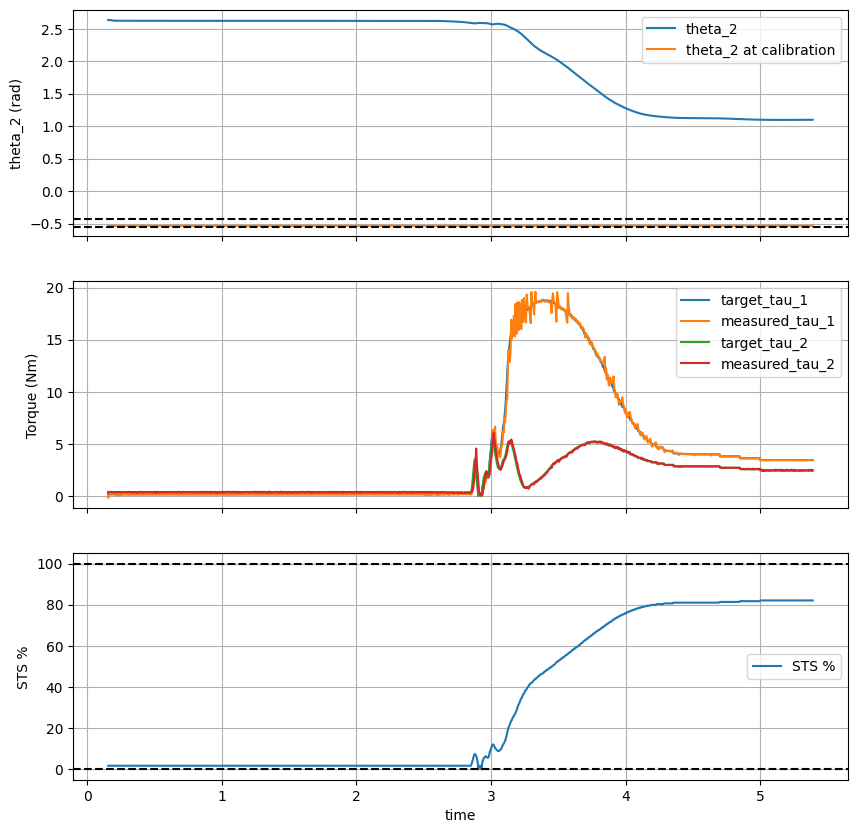

In [55]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
ax[0].plot(task_df.index, task_df["theta_2"], label="theta_2")
ax[0].plot(task_df.index, calibration_file["theta_2_values"], label="theta_2 at calibration")
ax[0].axhline(y=calibration_file["new_range"]["min"], linestyle="--", color="black")
ax[0].axhline(y=calibration_file["new_range"]["max"], linestyle="--", color="black")
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel("theta_2 (rad)")


ax[1].plot(task_df.index, task_df["target_tau_1"], label="target_tau_1")
ax[1].plot(task_df.index, task_df["measured_tau_1"], label="measured_tau_1")
ax[1].plot(task_df.index, task_df["target_tau_2"], label="target_tau_2")
ax[1].plot(task_df.index, task_df["measured_tau_2"], label="measured_tau_2")
ax[1].grid()
ax[1].legend()
ax[1].set_ylabel("Torque (Nm)")

ax[2].plot(task_df.index, task_df["index"], label="STS %")
ax[2].axhline(y=100, linestyle="--", color="black")
ax[2].axhline(y=0, linestyle="--", color="black")
ax[2].grid()
ax[2].legend()
ax[2].set_ylabel("STS %")
ax[2].set_xlabel('time')

Text(0, 0.5, 'torque (Nm)')

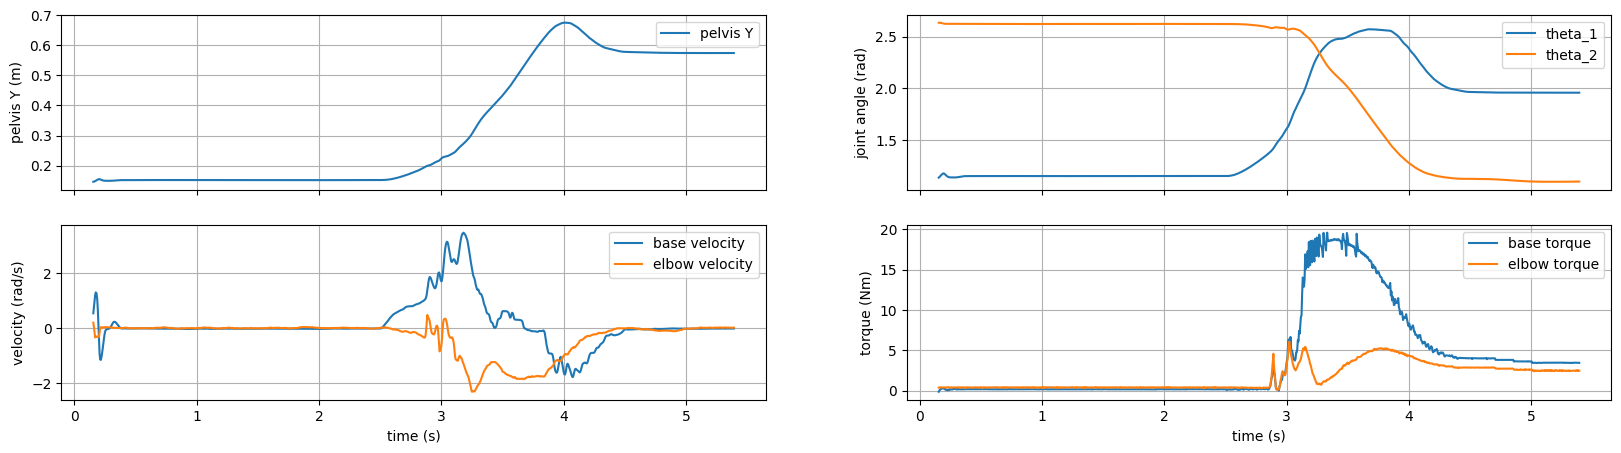

In [56]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(20, 5))

axs[0, 0].plot(task_df.index, -task_df.EE_X, label="pelvis Y")
axs[0, 0].grid()
axs[0, 0].legend()
axs[0, 0].set_ylabel("pelvis Y (m)")

axs[0, 1].plot(task_df.index, task_df.theta_1, label="theta_1")
axs[0, 1].plot(task_df.index, task_df.theta_2, label="theta_2")
axs[0, 1].grid()
axs[0, 1].legend()
axs[0, 1].set_ylabel("joint angle (rad)")


axs[1, 0].plot(task_df.index, task_df.velocity_1, label="base velocity")
axs[1, 0].plot(task_df.index, task_df.velocity_2, label="elbow velocity")
axs[1, 0].grid()
axs[1, 0].legend()
axs[1, 0].set_xlabel('time (s)')
axs[1, 0].set_ylabel('velocity (rad/s)')

axs[1, 1].plot(task_df.index, task_df.measured_tau_1, label="base torque")
axs[1, 1].plot(task_df.index, task_df.measured_tau_2, label="elbow torque")
axs[1, 1].grid()
axs[1, 1].legend()
axs[1, 1].set_xlabel('time (s)')
axs[1, 1].set_ylabel('torque (Nm)')